## Scaling estimates from AH2010

Two estimations of the depth of upwelling:

From equation 19 in AH2010:

$$Z = (\frac{fU\mathcal{F}L}{N^2})^{1/2}=D_h(\mathcal{F}R_L)^{1/2}$$

From table 4 in AH2010:

$$Z = 1.4\frac{U}{N}(\frac{L}{\mathcal{R}})^{1/2}$$

where $\mathcal{F}=R_o/(0.9+R_o)$, and $R_o=U/f\mathcal{R}$.

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

In [38]:
# Create an empty class to save information of every run

class run:
    pass

In [39]:
expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run73',
           'CNTDIFF_run75',
           'CNTDIFF_run67',
           'CNTDIFF_run51',
           'CNTDIFF_run69',
           'CNTDIFF_run71',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07',
           'LESS_BF_run01',
           'LESS_BF_run03']

markersizes = [15,13,11,9,13,11,9,13,13,11,11,11,11,11,11,13,11]
markerstyles = ['o','o','o','o','d',"d","d",'p','p','p','p','^','^','^','^','*','*']

exp_labels = ['$\kappa=10^{-7}$ $m^2s^{-1}$',
              '$N_0=$5.5x10$^{-3}$ $s^{-1}$,$\kappa=10^{-5}$ $m^2s^{-1}$,f=9.66x$^{-5}$,$U=0.34$ m/s',
              '$\kappa=10^{-4}$ $m^2s^{-1}$',
              '$\kappa=10^{-3}$ $m^2s^{-1}$',
              '$N_0$=6.3x10$^{-3}$ $s^{-1}$',
              '$N_0$=7.4x10$^{-3}$ $s^{-1}$',
              '$N_0$=4.5x10$^{-3}$ $s^{-1}$',
              'f=1.0x$10^{-4}$ $s^{-1}$',
              'f=7.68x$10^{-5}$ $s^{-1}$',
              'f=8.6x$^10{-5}$ $s^{-1}$',
              'f=6.4x$10^{-5}$ $s^{-1}$',
              '$\kappa=10^{-3}$,$\kappa_o=10^{-7}$ $m^2s^{-1}$',
              '$\kappa=10^{-4}$,$\kappa_o=10^{-7}$ $m^2s^{-1}$',
              '$\kappa=10^{-3}$,$\kappa_o=10^{-5}$ $m^2s^{-1}$',
              '$\kappa=10^{-4}$,$\kappa_o=10^{-5}$ $m^2s^{-1}$',
              '$U=0.31$ m/s',
              '$U=0.20$ m/s',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "slate grey",
           "black",
           "grey",
           "navy blue",
           "blue",
           "cerulean",
           "light blue",
          "deep rose",
          "cherry red",
          "brown",
          "gold",
           "red",
          "dark red"]# 


Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                6.3E-3,7.4E-3,4.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3,
                5.5E-3,5.5E-3])

fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5,9.66E-5,
               1.0E-4,7.68E-5,8.6E-5,6.4E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,
               9.66E-5,9.66E-5])

Us = np.array([0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,
               0.34,0.34,0.34,0.34,
               0.31,0.20])


#Define all runs, create an empty run records
CNTDIFF_kv7 = run()  
CNTDIFF_base = run()
CNTDIFF_kv4 = run()
CNTDIFF_kv3= run()
CNTDIFF_N63 = run()
CNTDIFF_N74 = run()
CNTDIFF_N45 = run()
CNTDIFF_f100 = run()
CNTDIFF_f76 = run()
CNTDIFF_f86 = run()
CNTDIFF_f64 = run()
DIFF3D_run04 = run()
DIFF3D_run05 = run()
DIFF3D_run06 = run()
DIFF3D_run07 = run()
LESS_BF_u31 = run()
LESS_BF_u20 = run()

records = [CNTDIFF_kv7,
           CNTDIFF_base, 
           CNTDIFF_kv4, 
           CNTDIFF_kv3,
           CNTDIFF_N63, 
           CNTDIFF_N74,
           CNTDIFF_N45,
           CNTDIFF_f100,
           CNTDIFF_f76,
           CNTDIFF_f86,
           CNTDIFF_f64,
           DIFF3D_run04,
           DIFF3D_run05,
           DIFF3D_run06,
           DIFF3D_run07,
           LESS_BF_u31,
           LESS_BF_u20]

# Fill the fields of the records
for record,expName,No,fo,uo,col,explabel,marksize,markstyle in zip(records,expNames,
                                                                   Nos,fs,Us,
                                                                   colours,exp_labels,
                                                                   markersizes,markerstyles):
    record.name = expName
    record.label = explabel
    record.color = col
    record.msize = marksize
    record.mstyle = markstyle
    record.N = No
    record.f = fo
    record.u = uo
    


### Define constants and non dimensional numbers

In [40]:
# Constants and scales

L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 150.0 # Shelf break depth

# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    retun(f*L/(N))
    
def Ro(U=0.36,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the hability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Rw(U=0.36,f=9.66E-5,Wsb=13000.0): 
    '''Rossby number using width at shelf break as length scale'''
    return(U/(f*Wsb))

def Bu(N=5.5E-3,f=9.66E-5,L=6400.0,Hs=150.0):
    '''Burger number'''
    return(N*Hs/(f*L))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)

def Zsimp(U=0.36,L=6400.0,N=5.5E-3,R=5000.0):
    '''Depth of upwelling as scaled in Allen and Hickey 2010'''
    return((1.4*U*(L**(1/2.)))/(N*(R**(1/2.))))

def Zcomp(U=0.36,L=6400.0,N=5.5E-3,R=5000.0,f=9.66E-4):
    '''Depth of upwelling as scaled in Allen and Hickey 2010, before estimation of F'''
    return(((F(Ro(U,f,R))*f*L*U)/N**2)**(0.5))


### Depth of upwelling two ways

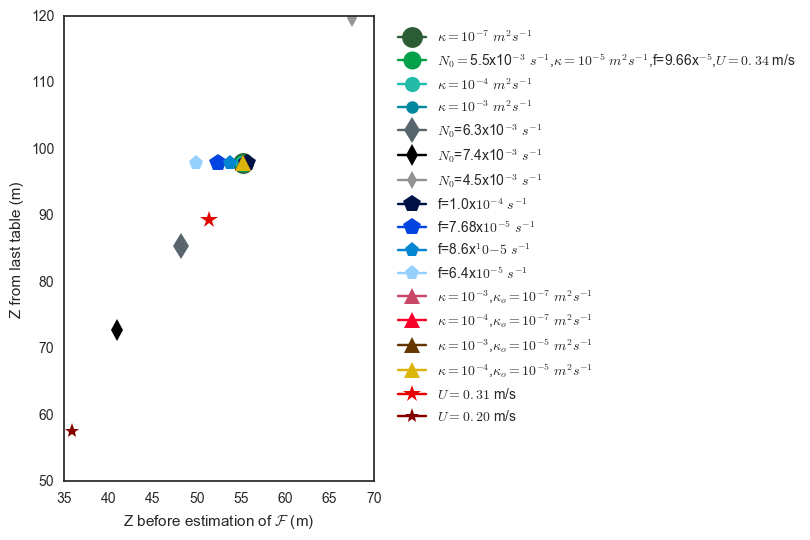

In [42]:
fig,ax = plt.subplots(1,1,figsize=(4,6))

for rec in records:
    
    rec.ZF = Zcomp(rec.u,L,rec.N,R,rec.f)
    rec.Z = Zsimp(rec.u,L,rec.N,R)
     
    ax.plot(rec.ZF,rec.Z,marker=rec.mstyle,markersize = rec.msize,color=sns.xkcd_rgb[rec.color],label = rec.label)
    
    ax.legend(bbox_to_anchor=(2.4,1))
ax.set_xlabel('Z before estimation of $\mathcal{F}$ (m)')
ax.set_ylabel('Z from last table (m)')


The depth of upwelling before they estimate $\mathcal{F}$ is shallower than the estimated. The estimated Z is between 1.6 and 1.9 times larger. Also, $Z$ does not depend on f while $Z(\mathcal{F})$ does.